In [1]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
x=df.drop(['Wine'],axis=1)
y=df['Wine']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 13), (54, 13))

In [5]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.42258476, 0.28605905, 0.18751969, 0.26006423, 0.19222507,
       0.47081543, 0.72242888, 0.11198746, 0.26123261, 0.62513559,
       0.55505532, 0.54542581, 0.54120984])

In [6]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

<IPython.core.display.Javascript object>

Flavanoids              0.722429
Color.int               0.625136
Hue                     0.555055
OD                      0.545426
Proline                 0.541210
Phenols                 0.470815
Alcohol                 0.422585
Malic.acid              0.286059
Proanth                 0.261233
Acl                     0.260064
Mg                      0.192225
Ash                     0.187520
Nonflavanoid.phenols    0.111987
dtype: float64

<AxesSubplot:>

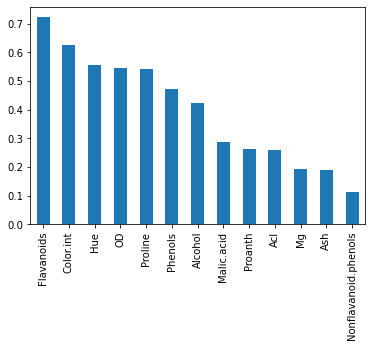

In [7]:
mutual_info.sort_values(ascending=False).plot.bar()

In [8]:
from sklearn.feature_selection import SelectKBest
select_five_best=SelectKBest(mutual_info_classif,k=5)
select_five_best.fit(x_train,y_train)
select_five_best.get_support()


array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [9]:
x_train.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [10]:
x_train.columns[select_five_best.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')